In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set()

In [2]:
import statsmodels.api as sm

In [3]:
pd.read_csv("dummiedata.csv")

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
df = pd.read_csv("1.03. Dummies.csv")

In [5]:
df

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [6]:
df['Attendance'] = df['Attendance'].map({'No':0, 'Yes':1})

In [7]:
df.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [8]:
y = df['GPA']
x = df.drop('GPA', axis=1)

In [9]:
x_ = sm.add_constant(x)

In [10]:
result = sm.OLS(y,x_).fit()

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.19e-15
Time:                        22:04:15   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
result_table = result.summary()

In [13]:
ols_table = result_table.tables[1].as_html()

In [14]:
ols = pd.read_html(ols_table, header=0, index_col=0)[0]

In [15]:
ols

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.6439,0.358,1.797,0.076,-0.069,1.357
SAT,0.0014,0.000,7.141,0.000,0.001,0.002
Attendance,0.2226,0.041,5.451,0.000,0.141,0.304


In [16]:
b0 = ols.loc['const','coef']
b1 = ols.loc['SAT','coef']
b2 = ols.loc['Attendance','coef']

In [17]:
y_hat_yes = b0 + b1*(df['SAT']) + b2*1
y_hat_no = b0 + b1*(df['SAT']) + b2*0

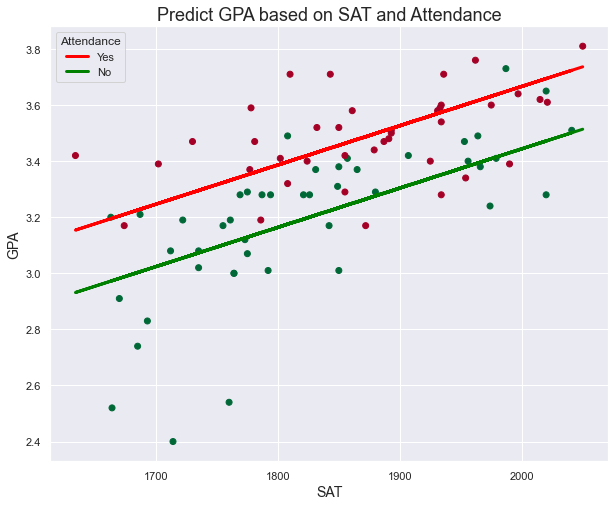

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(df['SAT'], df['GPA'], c=df['Attendance'], cmap='RdYlGn_r')
plt.plot(df['SAT'], y_hat_yes, color='red', lw=3, label='Yes')
plt.plot(df['SAT'], y_hat_no, color='green', lw=3, label='No')
plt.legend(title='Attendance')
plt.ylabel('GPA', fontsize=14)
plt.xlabel('SAT', fontsize=14)
plt.title('Predict GPA based on SAT and Attendance', fontsize=18)
plt.show()

In [19]:
x_

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [20]:
#scenario - Bob got 1700 SAT and did not attend, Alice got 1670 and did attend, Jan got 1200 and did not attend
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670, 1200], 'Attendance':[0,1,0]})
new_data = new_data[['const','SAT','Attendance']] #since dataframe will take on columns alphabetically

In [21]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1
2,1,1200,0


In [22]:
new_data.rename(index={0:'Bob', 1:'Alice', 2:'Jan'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1
Jan,1,1200,0


In [23]:
prediction = result.predict(new_data)

In [24]:
prediction

0    3.023513
1    3.204163
2    2.323612
dtype: float64

In [25]:
pred_df = pd.DataFrame(prediction)
pred_df

,0
0,3.023513
1,3.204163
2,2.323612


In [26]:
pred_df.rename(columns={0:'Pred_GPA'}, inplace=True)

In [27]:
new_data.merge(pred_df, left_index=True, right_index=True) #predicted GPA based on SAT and Attendance

,const,SAT,Attendance,Pred_GPA
0,1,1700,0,3.023513
1,1,1670,1,3.204163
2,1,1200,0,2.323612
